In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib 한글깨짐 지원
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False) 

import numpy as np

In [2]:
mapo_udong = pd.read_csv('mapo_udong.csv', encoding='utf-8')

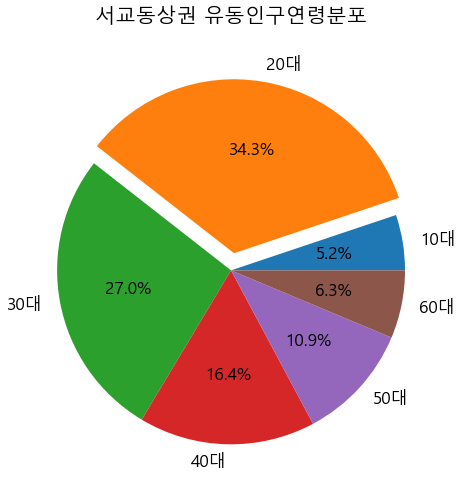

In [3]:
# 나이
age = [f'{i}0대' for i in range(1,7)]
# 값
values = [sum(mapo_udong[f'a{i}0s']) for i in range(1,6)]
values.append(sum(mapo_udong['a60']))
# 파이차트를 그리기위해 퍼센테이지로 변경
values = [v/sum(values) for v in values]
# 데이터프레임 생성
df = pd.DataFrame([[a,v] for a,v in zip(age,values)])
# 그래프
explode = [0, 0.10, 0, 0,0,0] # 튀어나오게하기
plt.figure(figsize=(25, 8))
plt.rc('font', size=17)
plt.pie(df[1], labels=df[0], autopct='%.1f%%', explode = explode)
plt.title('서교동상권 유동인구연령분포\n')
plt.show()

### 지역별 유동인구 분포

In [4]:
sangsu = pd.read_csv('sangsu.csv', encoding='utf-8')
hongdae = pd.read_csv('hongdae.csv', encoding='utf-8')
hapjung_hongdae = pd.read_csv('hapjung_hongdae.csv', encoding='utf-8')
hapjung = pd.read_csv('hapjung.csv', encoding='utf-8')

In [5]:
##상수
name = ['sangsu', 'hongdae', 'hapjung_hongdae', 'hapjung']
for i, land in enumerate([sangsu, hongdae, hapjung_hongdae, hapjung]):
    # 값
    values = [sum(land[f'a{i}0s']) for i in range(1,6)]
    values.append(sum(land['a60']))
    # 파이차트를 그리기위해 퍼센테이지로 변경
    values = [v/sum(values) for v in values]
    # 데이터프레임 생성
    globals()[f'df_{name[i]}'] = pd.DataFrame([[a,v] for a,v in zip(age,values)])

### 막대그래프

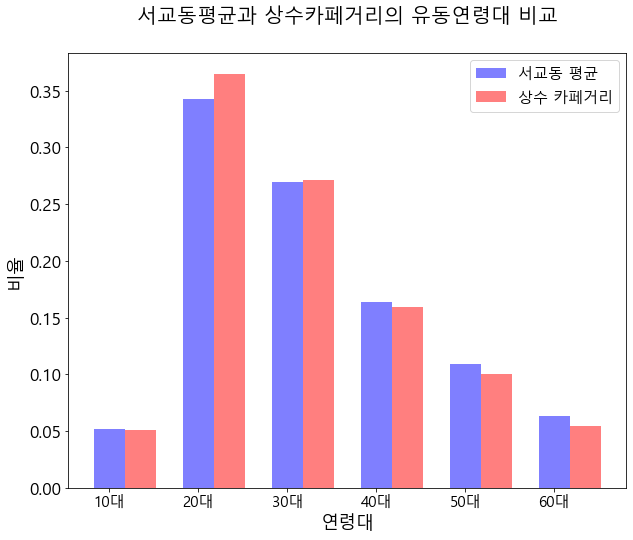

In [6]:
# 상수카페거리
bar_width = 0.35
alpha = 0.5

plt.figure(figsize=(10, 8))
x = np.arange(len(df[0]))

p1 = plt.bar(x,df[1] , bar_width, color='b', alpha=alpha,label='서교동 평균')
p2 = plt.bar(x + bar_width, df_sangsu[1], bar_width, color='r', alpha=alpha,label='상수 카페거리')

plt.title('서교동평균과 상수카페거리의 유동연령대 비교\n', fontsize=20)
plt.ylabel('비율', fontsize=18)
plt.xlabel('연령대', fontsize=18)
plt.xticks(x, df[0], fontsize=15)
plt.legend((p1[0], p2[0]), ('서교동 평균', '상수 카페거리'), fontsize=15)
plt.show()

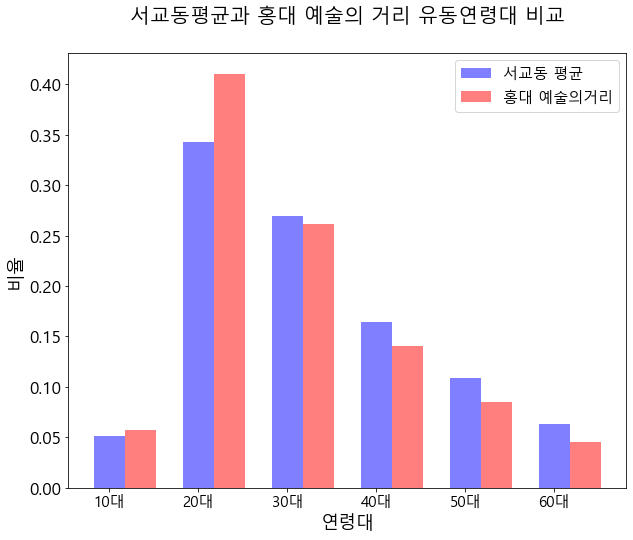

In [7]:
# 홍대예술의거리
bar_width = 0.35
alpha = 0.5

plt.figure(figsize=(10, 8))
x = np.arange(len(df[0]))

p1 = plt.bar(x,df[1] , bar_width, color='b', alpha=alpha,label='서교동 평균')
p2 = plt.bar(x + bar_width, df_hongdae[1], bar_width, color='r', alpha=alpha,label='홍대 예술의 거리')

plt.title('서교동평균과 홍대 예술의 거리 유동연령대 비교\n', fontsize=20)
plt.ylabel('비율', fontsize=18)
plt.xlabel('연령대', fontsize=18)
plt.xticks(x, df[0], fontsize=15)
plt.legend((p1[0], p2[0]), ('서교동 평균', '홍대 예술의거리'), fontsize=15)
plt.show()

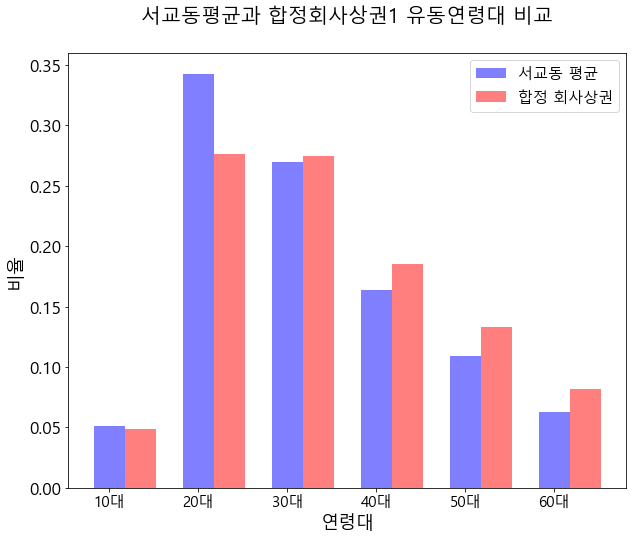

In [8]:
# 합정
bar_width = 0.35
alpha = 0.5

plt.figure(figsize=(10, 8))
x = np.arange(len(df[0]))

p1 = plt.bar(x,df[1] , bar_width, color='b', alpha=alpha,label='서교동 평균')
p2 = plt.bar(x + bar_width, df_hapjung[1], bar_width, color='r', alpha=alpha,label='합정 회사상권')

plt.title('서교동평균과 합정회사상권1 유동연령대 비교\n', fontsize=20)
plt.ylabel('비율', fontsize=18)
plt.xlabel('연령대', fontsize=18)
plt.xticks(x, df[0], fontsize=15)
plt.legend((p1[0], p2[0]), ('서교동 평균', '합정 회사상권'), fontsize=15)
plt.show()

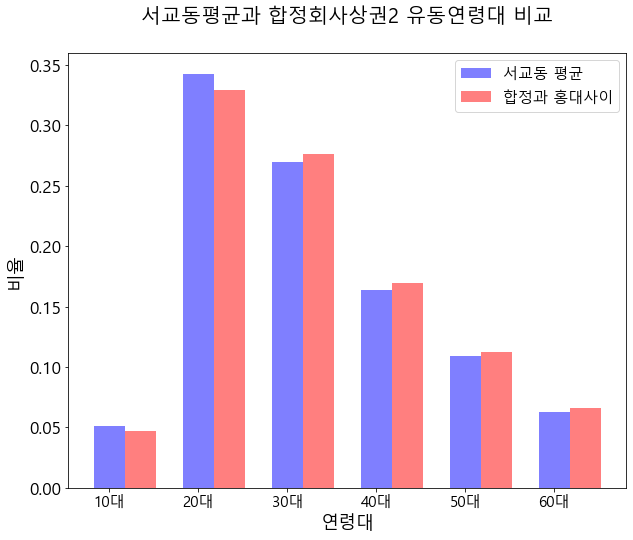

In [9]:
# 합정과 홍대사이
bar_width = 0.35
alpha = 0.5

plt.figure(figsize=(10, 8))
x = np.arange(len(df[0]))

p1 = plt.bar(x,df[1] , bar_width, color='b', alpha=alpha,label='서교동 평균')
p2 = plt.bar(x + bar_width, df_hapjung_hongdae[1], bar_width, color='r', alpha=alpha,label='합정과 홍대사이')

plt.title('서교동평균과 합정회사상권2 유동연령대 비교\n', fontsize=20)
plt.ylabel('비율', fontsize=18)
plt.xlabel('연령대', fontsize=18)
plt.xticks(x, df[0], fontsize=15)
plt.legend((p1[0], p2[0]), ('서교동 평균', '합정과 홍대사이'), fontsize=15)
plt.show()